#                      Projet statistique descriptive

### *réalisé par :*

> **Badreddine MOUHASSINE** <br> **DSE**

### *Plan du travail:*

>***Préparation des données***.<br>
>>*Importation des librairies de travail*<br>*Importer les données*<br>*Création d'une nouvelle colone sous le nom ' intervalle d'éxperience' qui s'agit d'une variable qualitative*<br>*définir une fonction qui sert a afficher le tableau de fréquence*


>***Description des variables***.<br>
>>*Description de la variable qualitative nominal sexe*<br>*Description de la variable qualitative ordinale niveau d'études*<br>*Description de la variable qualitative ordinale intervalle d'éxperience*<br>*Description de la variable quantitative continue Salaire net en MAD:*<br>
>>>*Etudions l'effet du Sexe sur le salaire*<br>*Etudions l'effet de l'intervalle d'expérience sur le salaire*<br>*Etudions l'effet de Niveau d'études sur le salaire*<br>*Etudions l'effet du sexe et nombre d'années d'expérience sur le salaire*<br>*Etudions l'effet du sexe et niveau d'études sur le salaire*<br>*Etudions l'effet de l'expérience et niveau d'études sur le salaire*<br>*Etudions l'effet de l'expérience et niveau d'études et le sexe sur le salaire*



>***Estimation du salaire dans cette entreprise***.<br>
>>*Régression linéaire simple entre le salaire et le niveau d'études*<br>*Régression linéaire simple entre le salaire et le nombre d'années d'expérience*

# *Préparation des données*

#### Importation des librairies de travail

In [217]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### Importer les données

In [137]:
#lire le fichier xlsx
sal_entr=pd.read_excel(r'C:\Users\badreddine\Downloads\Salaire_entreprise.xlsx')
sal_entr.to_csv('Salaire_entreprise.csv',encoding='utf-8', index=False)
#affichage des 5 premier ligne 
sal_entr.head()

,Identifiant,Sexe,Salaire net en MAD,Niveau d’étude,Nb année d’expérience
0,1,H,11396.563014,BAC+5,7.343141
1,2,H,11537.258151,BAC+5,9.598551
2,3,F,3601.932341,BAC+2,0.180836
3,4,H,8194.975406,BAC+5,2.162158
4,5,F,3210.132486,BAC,4.107386


**Création d'une nouvelle colone sous le nom ' intervalle d'éxperience' qui s'agit d'un variable qualitative**

In [171]:
intr_exp=['['+str(int(i))+','+str(int(i)+1)+']' for i in sal_entr['Nb année d’expérience']]
intr_exp
sal_entr['intervalle d\'expérience']=intr_exp
sal_entr=sal_entr.sort_values(by=['intervalle d\'expérience'])
sal_entr.head()

,Identifiant,Sexe,Salaire net en MAD,Niveau d’étude,Nb année d’expérience,intervalle d'expérience
142,143,H,3621.448802,BAC+2,0.251117,"[0,1]"
168,169,H,4244.404264,BAC+3,0.570734,"[0,1]"
60,61,H,4252.874410,BAC+3,0.995531,"[0,1]"
132,133,F,2949.500143,BAC,0.373388,"[0,1]"
66,67,H,5547.985589,BAC+4,0.888613,"[0,1]"


#### définir une fonction qui sert a afficher le tableau de fréquence

In [5]:
def tableau_freq(col,colname):
    freqtab={
        colname:[i for i in col.drop_duplicates()],
        'effectif':[i for i in col.value_counts()],
        'fréquence':[j for j in col.value_counts(normalize=True)],
        'pourcentage':[str(i*100)+' %' for i in col.value_counts(normalize=True) ]
    }
    df=pd.DataFrame(freqtab,columns=[colname,'effectif','fréquence','pourcentage'])
    return df

# *Description des variables*

## Description de la variable qualitative nominal *sexe*

*tableau de fréquence*

In [7]:
tab1=tableau_freq(sal_entr['Sexe'],'Sexe')
tab1

,Sexe,effectif,fréquence,pourcentage
0,H,106,0.549223,54.92227979274611 %
1,F,87,0.450777,45.07772020725388 %


<AxesSubplot:ylabel='fréquence'>

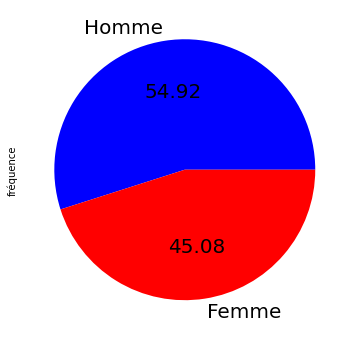

In [20]:
tab1['fréquence'].plot.pie(labels=['Homme','Femme'],
                          colors=["b", "r"],
                          autopct="%.2f",
                          fontsize=20,
                          figsize=(6, 6)
)

#### ***Commentaire***

> on trouve ici que le sexe 'Homme' est le dominant

## Description de la variable qualitative ordinale *niveau d'études*

*tableau de fréquences*

In [17]:
tab2=tableau_freq(sal_entr['Niveau d’étude'],'Niveau d’étude')
tab2

,Niveau d’étude,effectif,fréquence,pourcentage
0,BAC+5,63,0.326425,32.64248704663213 %
1,BAC+2,42,0.217617,21.761658031088082 %
2,BAC,36,0.186528,18.65284974093264 %
3,BAC+3,33,0.170984,17.098445595854923 %
4,BAC+4,19,0.098446,9.844559585492227 %


<AxesSubplot:ylabel='fréquence'>

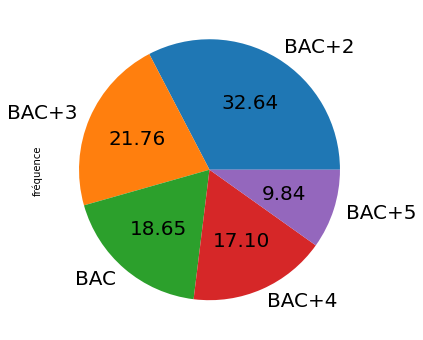

In [208]:
tab2['fréquence'].plot.pie(labels=sal_entr['Niveau d’étude'].drop_duplicates(),
                          autopct="%.2f",
                          fontsize=20,
                          figsize=(6, 6)
)

#### Commentaire:

>on remarque ici que la majorité des employée ont un niveau BAC+2

**Affichage du tableau croisée dynamique de sexe et niveau d'études**

In [199]:
tab3=pd.pivot_table(sal_entr,index=['Niveau d’étude','Sexe'],aggfunc={'Niveau d’étude': len})
tab3

Niveau d’étude
Niveau d’étude Sexe                
BAC            F                 17
               H                 19
BAC+2          F                 23
               H                 19
BAC+3          F                 14
               H                 19
BAC+4          F                 26
               H                 37
BAC+5          F                  7
               H                 12

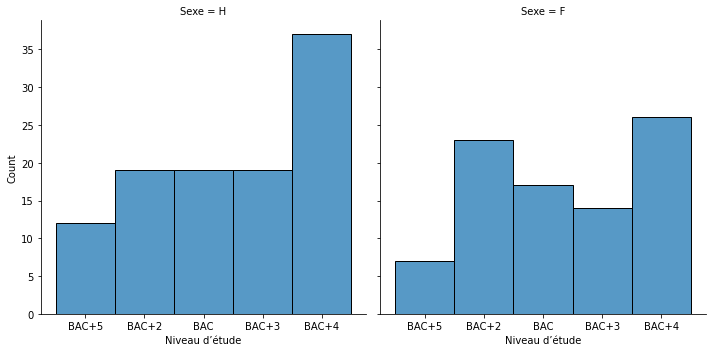

In [33]:
sns.displot(sal_entr, x="Niveau d’étude",col="Sexe", multiple="dodge")

#### Commentaire:

> D'après le tableau et les histogrammes on trouve les hommes ont un bon niveau d'étude par rapport aux femmes

## Description de la variable qualitative ordinale *intervalle d'éxperience*

*tableau de fréquences*

In [119]:
tab4=tableau_freq(sal_entr['intervalle d\'expérience'],'intervalle d\'expérience')
tab4

,intervalle d'expérience,effectif,fréquence,pourcentage
0,"[0,1]",26,0.134715,13.471502590673575 %
1,"[1,2]",25,0.129534,12.953367875647666 %
2,"[2,3]",23,0.119171,11.917098445595855 %
3,"[3,4]",23,0.119171,11.917098445595855 %
4,"[4,5]",22,0.113990,11.398963730569948 %
5,"[5,6]",16,0.082902,8.290155440414509 %
6,"[6,7]",16,0.082902,8.290155440414509 %
7,"[7,8]",15,0.077720,7.772020725388601 %
8,"[8,9]",14,0.072539,7.253886010362693 %
9,"[9,10]",13,0.067358,6.7357512953367875 %


<AxesSubplot:ylabel='fréquence'>

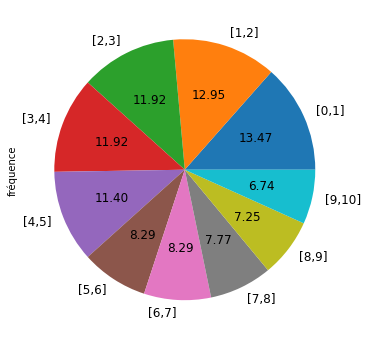

In [200]:
tab4['fréquence'].plot.pie(labels=sal_entr['intervalle d\'expérience'].drop_duplicates(),
                          autopct="%.2f",
                          fontsize=12,
                          figsize=(6, 6)
)

In [202]:
tab5=pd.pivot_table(sal_entr,index=['intervalle d\'expérience','Sexe'],aggfunc={'intervalle d\'expérience': len})
tab5.transpose()

intervalle d'expérience [0,1]    [1,2]    [2,3]     [3,4]     [4,5]    [5,6]  \
Sexe                        F  H     F  H     F   H     F   H     F  H     F   
intervalle d'expérience     7  7     8  7    12  13     6  10     8  8     5   

intervalle d'expérience    [6,7]     [7,8]     [8,9]     [9,10]      
Sexe                     H     F   H     F   H     F   H      F   H  
intervalle d'expérience  8    11  12    13  10    10  12      7  19

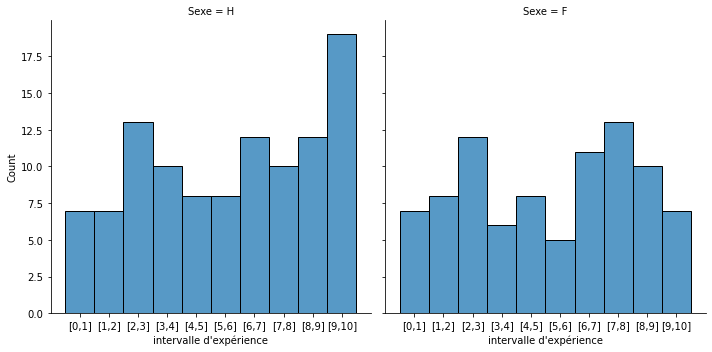

In [122]:
sns.displot(sal_entr, x='intervalle d\'expérience',col="Sexe", multiple="dodge")

#### Commentaire:

> on touve que les hommes dans cette entreprise sont plus expert que les femmes selon le nombre d'année d'expérience

## Description de la variable quantitative continue *Salaire net en MAD*

*calcul du moyenne, écart type,les quartilles ...*

In [111]:
tab6=sal_entr['Salaire net en MAD'].describe()
tab6

count      193.000000
mean      5109.102782
std       2024.794516
min       2931.153372
25%       3707.784942
50%       4430.486500
75%       5800.973086
max      11866.788509
Name: Salaire net en MAD, dtype: float64

*Affichons la boite à moustache correspendantes*

<AxesSubplot:>

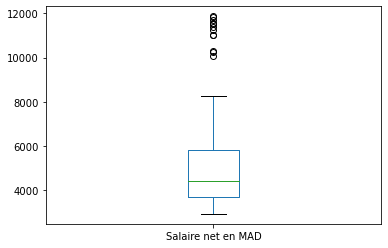

In [16]:
sal_entr['Salaire net en MAD'].plot.box()

#### Commentaire:

> D'aprés cette boite à moustaches on trouve qu'il ya des points abérrants qui peuvent affecter notre étude.

#### Etudions l'effet du Sexe sur le salaire

In [85]:
tab7=pd.pivot_table(sal_entr,index=['Sexe'],values=['Salaire net en MAD'],aggfunc={'Salaire net en MAD':[min,max,np.mean]})
tab7

Salaire net en MAD                          
                    max         mean          min
Sexe                                             
F          11827.859261  4896.017985  2949.500143
H          11866.788509  5283.993134  2931.153372

<AxesSubplot:xlabel='Sexe'>

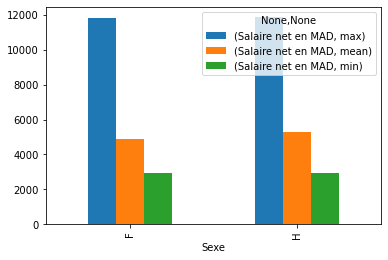

In [90]:
tab7.plot(kind='bar')

#### Commentaire:

> on remarque que le Sexe n'a pas une grande influence sur la répartition des salaires

#### Etudions l'effet de l'intervalle d'expérience sur le salaire

In [127]:
tab8=pd.pivot_table(sal_entr,index=['intervalle d\'expérience'],values=['Salaire net en MAD'],aggfunc={'Salaire net en MAD':[min,max,np.mean]})
tab8.transpose()

intervalle d'expérience        [0,1]        [1,2]        [2,3]         [3,4]  \
Salaire net en MAD max   8040.216588  5623.244377  8251.006451  10239.151854   
                   mean  4466.607343  4518.133332  4720.549954   4920.343333   
                   min   2931.153372  3007.697158  3014.434769   3013.290222   

intervalle d'expérience         [4,5]        [5,6]         [6,7]  \
Salaire net en MAD max   10287.756880  5961.484132  11570.984148   
                   mean   4791.356399  4900.281799   5286.842398   
                   min    3210.132486  3295.238535   3164.586471   

intervalle d'expérience         [7,8]         [8,9]        [9,10]  
Salaire net en MAD max   11396.563014  11528.992437  11866.788509  
                   mean   5095.309611   5232.427376   6336.339527  
                   min    3109.736941   3143.531064   3068.914403

<AxesSubplot:xlabel="intervalle d'expérience">

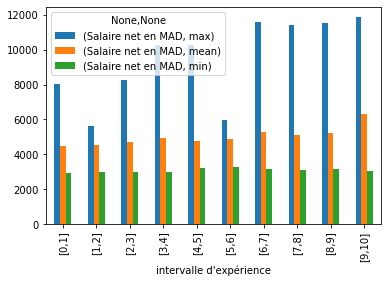

In [203]:
tab8.plot(kind='bar')

#### Commentaire:

>on remarque que l'expérience de l'employée à un effet sur le salaire , car d'aprés le tableau et les histogrammes on trouve que lorsque l'expérience est maximal le minimum et la moyenne des salaires est maximales.

#### Etudions l'effet de Niveau d'études sur le salaire

In [131]:
tab9=pd.pivot_table(sal_entr,index=['Niveau d’étude'],values=['Salaire net en MAD'],aggfunc={'Salaire net en MAD':[min,max,np.mean]})
tab9.transpose()

Niveau d’étude                   BAC        BAC+2        BAC+3        BAC+4  \
Salaire net en MAD max   3662.816534  4404.275433  5071.791234  6280.179180   
                   mean  3224.077591  3845.029717  4471.746350  5822.455085   
                   min   2931.153372  3601.932341  4209.767998  5534.340408   

Niveau d’étude                  BAC+5  
Salaire net en MAD max   11866.788509  
                   mean  10216.657661  
                   min    8039.054048

<AxesSubplot:xlabel='Niveau d’étude'>

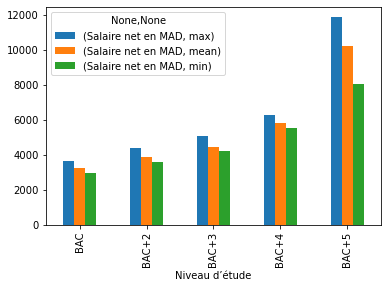

In [132]:
tab9.plot(kind='bar')

#### Commentaire:

> on trouve ici que le niveau d'études à un grand effet sur le salaire. En effet si l'employée possède un bon niveau d'études alors il y aura plus de chance pour qu'il reçoit un bon salaire

#### Etudions l'effet du sexe et nombre d'années d'expérience sur le salaire

In [133]:
tab10=pd.pivot_table(sal_entr,index=['intervalle d\'expérience','Sexe'],aggfunc={'Salaire net en MAD': np.mean})
tab10.transpose()

intervalle d'expérience        [0,1]                     [1,2]               \
Sexe                               F            H            F            H   
Salaire net en MAD       5141.006588  3792.208099  4331.887008  4730.986274   

intervalle d'expérience        [2,3]                     [3,4]               \
Sexe                               F            H            F            H   
Salaire net en MAD       4333.479914  5077.845376  5716.786452  4442.477461   

intervalle d'expérience      [4,5]                     [5,6]               \
Sexe                             F            H            F            H   
Salaire net en MAD       5351.0044  4231.708398  4245.702737  5309.393712   

intervalle d'expérience        [6,7]                     [7,8]               \
Sexe                               F            H            F            H   
Salaire net en MAD       4690.744485  5833.265485  4859.304285  5402.116536   

intervalle d'expérience        [8,9]                    [9,10]               
Sexe                               F            H            F            H  
Salaire net en MAD       4475.526955  5863.177726  6492.568767  6278.781385

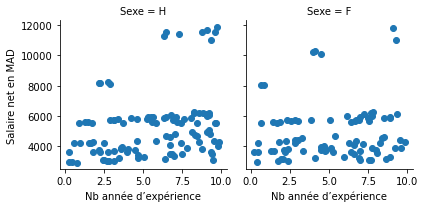

In [54]:
g = sns.FacetGrid(sal_entr, col="Sexe", margin_titles=True,)
g.map(plt.scatter, "Nb année d’expérience", "Salaire net en MAD")

In [134]:
tab11=pd.pivot_table(sal_entr,index=['intervalle d\'expérience','Sexe'],values=['Salaire net en MAD'],aggfunc={'Salaire net en MAD':[min,max,np.mean]})
tab11.transpose()

intervalle d'expérience        [0,1]                     [1,2]               \
Sexe                               F            H            F            H   
Salaire net en MAD max   8040.216588  5547.985589  5623.244377  5614.485833   
                   mean  5141.006588  3792.208099  4331.887008  4730.986274   
                   min   2949.500143  2931.153372  3007.697158  3623.281203   

intervalle d'expérience        [2,3]                      [3,4]               \
Sexe                               F            H             F            H   
Salaire net en MAD max   5736.806785  8251.006451  10239.151854  5781.423363   
                   mean  4333.479914  5077.845376   5716.786452  4442.477461   
                   min   3014.434769  3055.704735   3709.793844  3013.290222   

intervalle d'expérience         [4,5]                     [5,6]               \
Sexe                                F            H            F            H   
Salaire net en MAD max   10287.756880  5882.005753  5769.060936  5961.484132   
                   mean   5351.004400  4231.708398  4245.702737  5309.393712   
                   min    3210.132486  3259.642142  3295.238535  3317.036142   

intervalle d'expérience        [6,7]                      [7,8]                \
Sexe                               F             H            F             H   
Salaire net en MAD max   5989.730887  11570.984148  6280.179180  11396.563014   
                   mean  4690.744485   5833.265485  4859.304285   5402.116536   
                   min   3217.944988   3164.586471  3109.736941   3337.581870   

intervalle d'expérience        [8,9]                      [9,10]                
Sexe                               F             H             F             H  
Salaire net en MAD max   5936.093838  11528.992437  11827.859261  11866.788509  
                   mean  4475.526955   5863.177726   6492.568767   6278.781385  
                   min   3143.531064   3844.410381   3901.444251   3068.914403

<AxesSubplot:xlabel='Salaire net en MAD', ylabel="intervalle d'expérience">

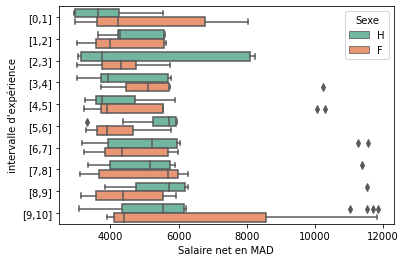

In [125]:
sns.boxplot(y='intervalle d\'expérience',
            x="Salaire net en MAD", hue="Sexe", 
            data=sal_entr.sort_values(by=['intervalle d\'expérience'])
            ,orient="h", 
            palette="Set2",)

#### Commentaire:

>D’après la dernière figure des boites à moustaches et le tableau croisé dynamique, on trouve que pour les femmes ayant un intervalle d’expérience [9,10], il y a une grande dispersion, où la majorité des femmes ont un salaire supérieur au salaire moyenne et le salaire est maximale par rapport aux hommes. Aussi on trouve que pour les femmes avec une expérience moins d’un an sont bien payé que les hommes.

#### Etudions l'effet du sexe et niveau d'études sur le salaire

In [138]:
tab12=pd.pivot_table(sal_entr,index=['Niveau d’étude','Sexe'],values=['Salaire net en MAD'],aggfunc={'Salaire net en MAD':[min,max,np.mean]})
tab12.transpose()

Niveau d’étude                   BAC                     BAC+2               \
Sexe                               F            H            F            H   
Salaire net en MAD max   3662.816534  3526.650053  4404.275433  4344.463222   
                   mean  3240.089811  3209.750869  3852.838025  3835.577555   
                   min   2949.500143  2931.153372  3601.932341  3609.565454   

Niveau d’étude                 BAC+3                     BAC+4               \
Sexe                               F            H            F            H   
Salaire net en MAD max   4664.202104  5071.791234  6280.179180  6273.124876   
                   mean  4392.028258  4530.485997  5817.721106  5825.781665   
                   min   4209.767998  4212.363862  5536.016294  5534.340408   

Niveau d’étude                  BAC+5                
Sexe                                F             H  
Salaire net en MAD max   11827.859261  11866.788509  
                   mean   9929.659855  10384.073048  
                   min    8039.054048   8085.869605

<AxesSubplot:xlabel='Salaire net en MAD', ylabel='Niveau d’étude'>

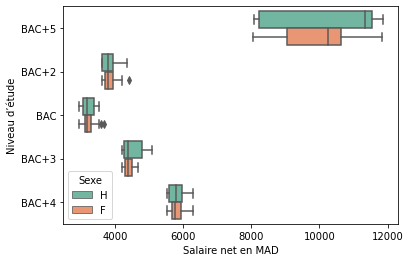

In [161]:
sns.boxplot(y='Niveau d’étude',
            x="Salaire net en MAD", hue="Sexe", 
            data=sal_entr
            ,orient="h", 
            palette="Set2",)

<AxesSubplot:xlabel='Niveau d’étude,Sexe'>

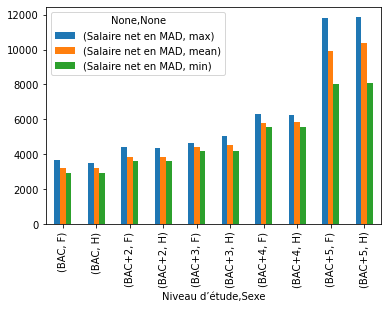

In [148]:
tab12.plot(kind='bar')

#### Commentaire:

> on remarque que lorsque les employées ont le même niveau d'étude mais différent sexe on ne trouve pas une grande différence au niveau des salaires. Par contre si ils ont de même sexe mais de niveau d'études différent alors il ya une grande différence des salaires

#### Etudions l'effet de l'expérience et niveau d'études sur le salaire

In [177]:
tab13=sal_entr.groupby(['intervalle d\'expérience', 'Niveau d’étude'], as_index=False)['Salaire net en MAD'].mean()
tab14=pd.pivot_table(tab13,index=['Niveau d’étude','intervalle d\'expérience'],values=['Salaire net en MAD'])
tab14

Salaire net en MAD
Niveau d’étude intervalle d'expérience                    
BAC            [0,1]                           2957.060943
               [1,2]                           3091.733386
               [2,3]                           3083.722187
               [3,4]                           3114.953286
               [4,5]                           3294.088262
               [5,6]                           3306.137338
               [6,7]                           3404.307115
               [7,8]                           3312.547230
               [8,9]                           3314.287961
               [9,10]                          3292.156820
BAC+2          [0,1]                           3611.313282
               [1,2]                           3679.483511
               [2,3]                           3701.320194
               [3,4]                           3820.238729
               [4,5]                           3798.409710
               [5,6]                           3750.006056
               [6,7]                           4119.428909
               [7,8]                           3984.293556
               [8,9]                           3976.433218
               [9,10]                          4030.331017
BAC+3          [0,1]                           4235.682224
               [1,2]                           4253.903971
               [2,3]                           4332.911039
               [3,4]                           4477.001719
               [4,5]                           4341.924497
               [5,6]                           4515.283762
               [6,7]                           4560.339350
               [7,8]                           4510.132078
               [8,9]                           4622.753437
               [9,10]                          4683.222704
BAC+4          [0,1]                           5542.000941
               [1,2]                           5589.077799
               [2,3]                           5729.654995
               [3,4]                           5700.206304
               [4,5]                           5846.925717
               [5,6]                           5794.401295
               [6,7]                           5810.510645
               [7,8]                           5904.284531
               [8,9]                           5997.302852
               [9,10]                          5943.461723
BAC+5          [0,1]                           8039.635318
               [2,3]                           8180.079847
               [3,4]                          10239.151854
               [4,5]                          10178.191995
               [6,7]                          11418.815937
               [7,8]                          11396.563014
               [8,9]                          11528.992437
               [9,10]                         11493.030395

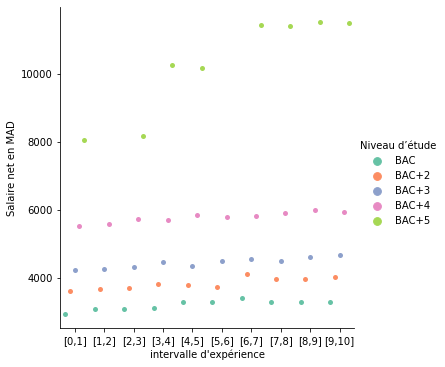

In [185]:
sns.catplot(x="intervalle d'expérience", y="Salaire net en MAD",
                hue="Niveau d’étude",
                data=tab13, kind="swarm",
                palette="Set2",dodge=True);

#### Commentaire:

> *on remarque que le salaire varie d'une grande façon pour les employées de même expériences et niveau d'études différent plus que les employées ayant le même niveau d'étude et expériences différentes.*

#### Etudions l'effet de l'expérience et niveau d'études et le sexe sur le salaire

In [194]:
tab15=sal_entr.groupby(['Niveau d’étude','intervalle d\'expérience', 'Sexe'], as_index=False)['Salaire net en MAD'].mean()
tab16=pd.pivot_table(tab15,index=['Niveau d’étude','intervalle d\'expérience','Sexe'],values=['Salaire net en MAD'])
tab16

Salaire net en MAD
Niveau d’étude intervalle d'expérience Sexe                    
BAC            [0,1]                   F            2949.500143
                                       H            2959.581209
               [1,2]                   F            3091.733386
               [2,3]                   F            3093.301398
                                       H            3078.932581
...                                                         ...
BAC+5          [6,7]                   H           11418.815937
               [7,8]                   H           11396.563014
               [8,9]                   H           11528.992437
               [9,10]                  F           11416.406251
                                       H           11531.342467

[80 rows x 1 columns]

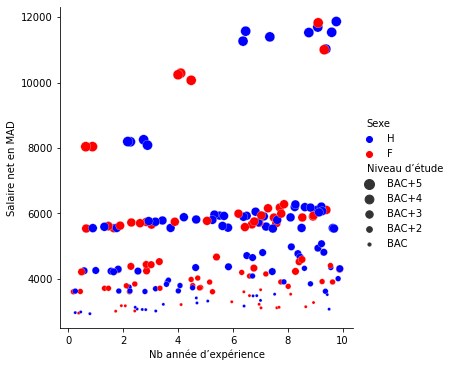

In [207]:
sns.relplot(
    data=sal_entr.sort_values(by=['Niveau d’étude'], ascending=False), x="Nb année d’expérience", y="Salaire net en MAD",
    hue="Sexe", size="Niveau d’étude",
    palette=["b", "r"], sizes=(10, 100)
)

 #### Commentaire:

> D'après ce dernier nuage de point qui représente la répartition des salaires selon le Sexe, l'expérience et niveau d'études, on peut observer qu'il y a pas une grande variation des salaire pour les employées de même niveau d'étude, Par contre pou les employée ayant niveau d'études différents on trouve une grande variation des salaires en fonction de niveau d'études plus que nombre d'années d'expérience.

#### Matrice des corrélations:

***premierement on doit convertir le variable qualitative niveau d'études en variables quantitative discret***

In [216]:
niveau_id={
    'BAC':0,
    'BAC+2':2,
    'BAC+3':3,
    'BAC+4':4,
    'BAC+5':5
}
nb_etude=[niveau_id[niveau] for niveau in sal_entr["Niveau d’étude"]]
sal_entr['nb d\'étude']=nb_etude
sal_entr.head()

,Identifiant,Sexe,Salaire net en MAD,Niveau d’étude,Nb année d’expérience,intervalle d'expérience,nb d'étude
142,143,H,3621.448802,BAC+2,0.251117,"[0,1]",2
168,169,H,4244.404264,BAC+3,0.570734,"[0,1]",3
60,61,H,4252.874410,BAC+3,0.995531,"[0,1]",3
132,133,F,2949.500143,BAC,0.373388,"[0,1]",0
66,67,H,5547.985589,BAC+4,0.888613,"[0,1]",4


In [212]:
sal_entr.corr()

,Identifiant,Salaire net en MAD,Nb année d’expérience,nb d'étude
Identifiant,1.000000,-0.020071,-0.092679,0.050239
Salaire net en MAD,-0.020071,1.000000,0.229546,0.796086
Nb année d’expérience,-0.092679,0.229546,1.000000,0.123702
nb d'étude,0.050239,0.796086,0.123702,1.000000


#### Commentaire:

> d'après la matrice des corrélations on peut remarquer que:<br>
>>***-le salaire et le nombre d'années d'expérience sont faiblement corrélé***.<br>***-le salaire et le nombre d'années d'études sont bien corrélé***

### Conclusion :

>*D'après l'étude statistique de l'influence de chaque variable sur le salaire et le tableau des corrélation on peut conclure que le salaire varie une grande variation avec niveau d'étude. Autrement dit , dans cette entreprise si vous avez un très bon niveau d'études vous aurez plus de chance d'avoir un bon salaire*

# *Estimation du salaire dans cette entreprise*

### Régression linéaire simple entre le salaire et le niveau d'études

In [281]:
X=sal_entr['nb d\'étude']
Y=sal_entr['Salaire net en MAD']
reg=stats.linregress(X,Y)
a,b=reg.slope,reg.intercept
def salaire_éstimé(x):
    return a*x+b
reg
sal_entr['salaire prédicté']=salaire_éstimé(X)
sal_entr.head()

,Identifiant,Sexe,Salaire net en MAD,Niveau d’étude,Nb année d’expérience,intervalle d'expérience,nb d'étude,salaire prédicté
142,143,H,3621.448802,BAC+2,0.251117,"[0,1]",2,4358.228654
168,169,H,4244.404264,BAC+3,0.570734,"[0,1]",3,5364.608561
60,61,H,4252.874410,BAC+3,0.995531,"[0,1]",3,5364.608561
132,133,F,2949.500143,BAC,0.373388,"[0,1]",0,2345.468841
66,67,H,5547.985589,BAC+4,0.888613,"[0,1]",4,6370.988468


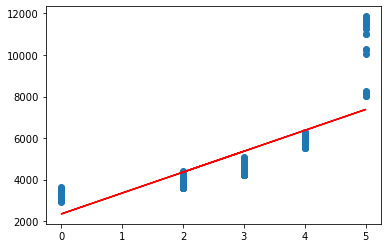

In [271]:
plt.plot(X, Y, 'o', label='les valeurs originals')
plt.plot(X,sal_entr['salaire prédicté'],c='r')

In [276]:
#éstimation du salaire pour un employée avec BAC+6
salaire_éstimé(6)

8383.748281951264

In [279]:
reg

LinregressResult(slope=1006.3799068930563, intercept=2345.4688405929264, rvalue=0.796085611288653, pvalue=1.5816401857665539e-43, stderr=55.35705172589453)

### Régression linéaire simple entre le salaire et le nombre d'années d'expérience


In [286]:
X=sal_entr['Nb année d’expérience']
Y=sal_entr['Salaire net en MAD']
reg1=stats.linregress(X,Y)
a,b=reg1.slope,reg1.intercept
def salaire_éstimé1(x):
    return a*x+b
reg
sal_entr['salaire prédicté']=salaire_éstimé1(X)
sal_entr.head()

,Identifiant,Sexe,Salaire net en MAD,Niveau d’étude,Nb année d’expérience,intervalle d'expérience,nb d'étude,salaire prédicté
142,143,H,3621.448802,BAC+2,0.251117,"[0,1]",2,4275.549287
168,169,H,4244.404264,BAC+3,0.570734,"[0,1]",3,4327.023818
60,61,H,4252.874410,BAC+3,0.995531,"[0,1]",3,4395.437526
132,133,F,2949.500143,BAC,0.373388,"[0,1]",0,4295.241029
66,67,H,5547.985589,BAC+4,0.888613,"[0,1]",4,4378.218319


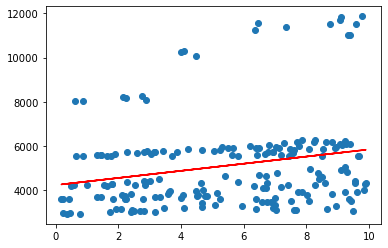

In [287]:
plt.plot(X, Y, 'o', label='les valeurs originals')
plt.plot(X,sal_entr['salaire prédicté'],c='r')

In [299]:
reg1

LinregressResult(slope=161.05061395914575, intercept=4235.10671945771, rvalue=0.2295456233800982, pvalue=0.001321714750655655, stderr=49.410866706446186)

In [297]:
#éstimation du salaire pour un employée avec 12 ans d'éxpérience
salaire_éstimé1(12)

6167.714086967459